<a href="https://colab.research.google.com/github/Collins-nnaji/Data_Science/blob/main/Project_5_SupplyChain_RandomForest_SupportVectorClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/DataCoSupplyChainDataset.csv"

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(path,encoding='latin1')

In [ ]:
df.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Department Id,Latitude,Longitude,...,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status
0,3,4,91.250000,314.640015,0,73,20755,2,18.251453,-66.037056,...,327.75,0.29,1,327.75,314.640015,91.250000,1360,73,327.75,0
1,5,4,-249.089996,311.359985,1,73,19492,2,18.279451,-66.037064,...,327.75,-0.80,1,327.75,311.359985,-249.089996,1360,73,327.75,0
2,4,4,-247.779999,309.720001,0,73,19491,2,37.292233,-121.881279,...,327.75,-0.80,1,327.75,309.720001,-247.779999,1360,73,327.75,0
3,3,4,22.860001,304.809998,0,73,19490,2,34.125946,-118.291016,...,327.75,0.08,1,327.75,304.809998,22.860001,1360,73,327.75,0
4,2,4,134.210007,298.250000,0,73,19489,2,18.253769,-66.037048,...,327.75,0.45,1,327.75,298.250000,134.210007,1360,73,327.75,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
print(df.isnull().sum())

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [ ]:
# Get a list of all object columns
object_cols = df.select_dtypes(include=['object']).columns

# Drop the object columns
df = df.drop(columns=object_cols)

# Print the first few rows of the DataFrame to confirm
print(df.head())
print(df.isnull().sum())

In [ ]:
# List of columns to drop
columns_to_drop = ["Order Zipcode", "Product Description", "Customer Zipcode"]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.compose import make_column_transformer

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create a column transformer
preprocessor = make_column_transformer(
    (StandardScaler(), numerical_cols)
)

# Apply the transformer to your data
df_scaled = preprocessor.fit_transform(df)

# Convert the result back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

print(df_scaled.head())


In [ ]:
df_scaled.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Department Id,Latitude,Longitude,...,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status
0,-0.306491,0.777152,0.663344,1.095708,-1.101733,2.630978,3.378318,-2.113536,-1.168631,0.880813,...,1.334822,0.362801,-0.775836,0.93729,1.095708,0.663343,1.983945,2.630978,1.334822,0.0
1,0.925251,0.777152,-2.595580,1.068384,0.907661,2.630978,3.074924,-2.113536,-1.165778,0.880812,...,1.334822,-1.972275,-0.775836,0.93729,1.068384,-2.595582,1.983945,2.630978,1.334822,0.0
2,0.309380,0.777152,-2.583036,1.054722,-1.101733,2.630978,3.074684,-2.113536,0.771609,-1.724690,...,1.334822,-1.972275,-0.775836,0.93729,1.054722,-2.583038,1.983945,2.630978,1.334822,0.0
3,-0.306491,0.777152,0.008476,1.013820,-1.101733,2.630978,3.074443,-2.113536,0.448967,-1.557181,...,1.334822,-0.087076,-0.775836,0.93729,1.013820,0.008474,1.983945,2.630978,1.334822,0.0
4,-0.922361,0.777152,1.074707,0.959174,-1.101733,2.630978,3.074203,-2.113536,-1.168395,0.880813,...,1.334822,0.705564,-0.775836,0.93729,0.959174,1.074706,1.983945,2.630978,1.334822,0.0


In [ ]:
df_scaled.info()

In [ ]:
# Split the data
X = df_scaled.drop('Late_delivery_risk', axis=1)
y = df_scaled['Late_delivery_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert to binary target
y_train = y_train.round().astype(int)
y_test = y_test.round().astype(int)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf.predict(X_test)

# Print the accuracy of the model on the test data
print("Test Accuracy: ", rf.score(X_test, y_test))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))



Test Accuracy:  0.9751828052293374
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.95      0.97     16307
           1       0.96      1.00      0.98     19797

    accuracy                           0.98     36104
   macro avg       0.98      0.97      0.97     36104
weighted avg       0.98      0.98      0.98     36104



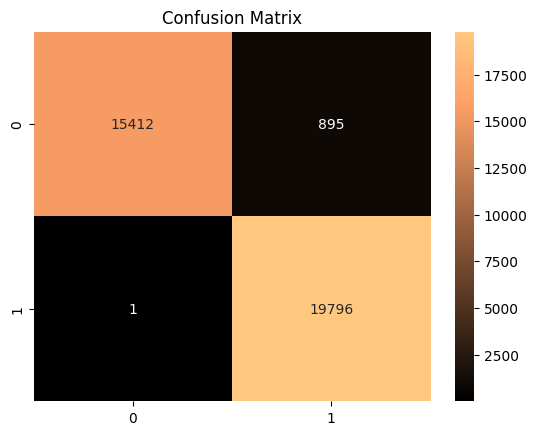

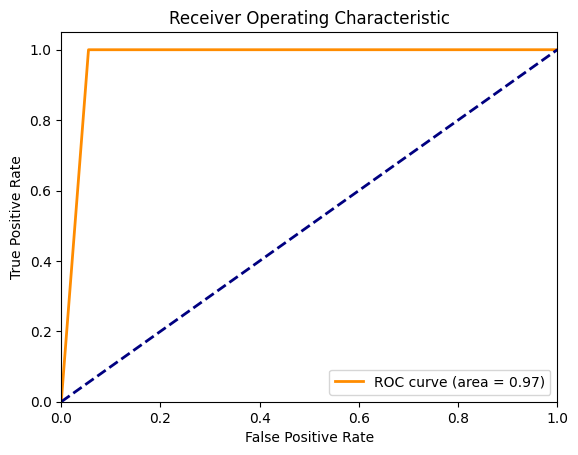

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the test set results
y_pred = rf.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.copper)
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_grid, cv=5, n_iter=10, n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", random_search.best_params_)

# Predict the test set results
y_pred = random_search.predict(X_test)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.copper)
plt.show()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

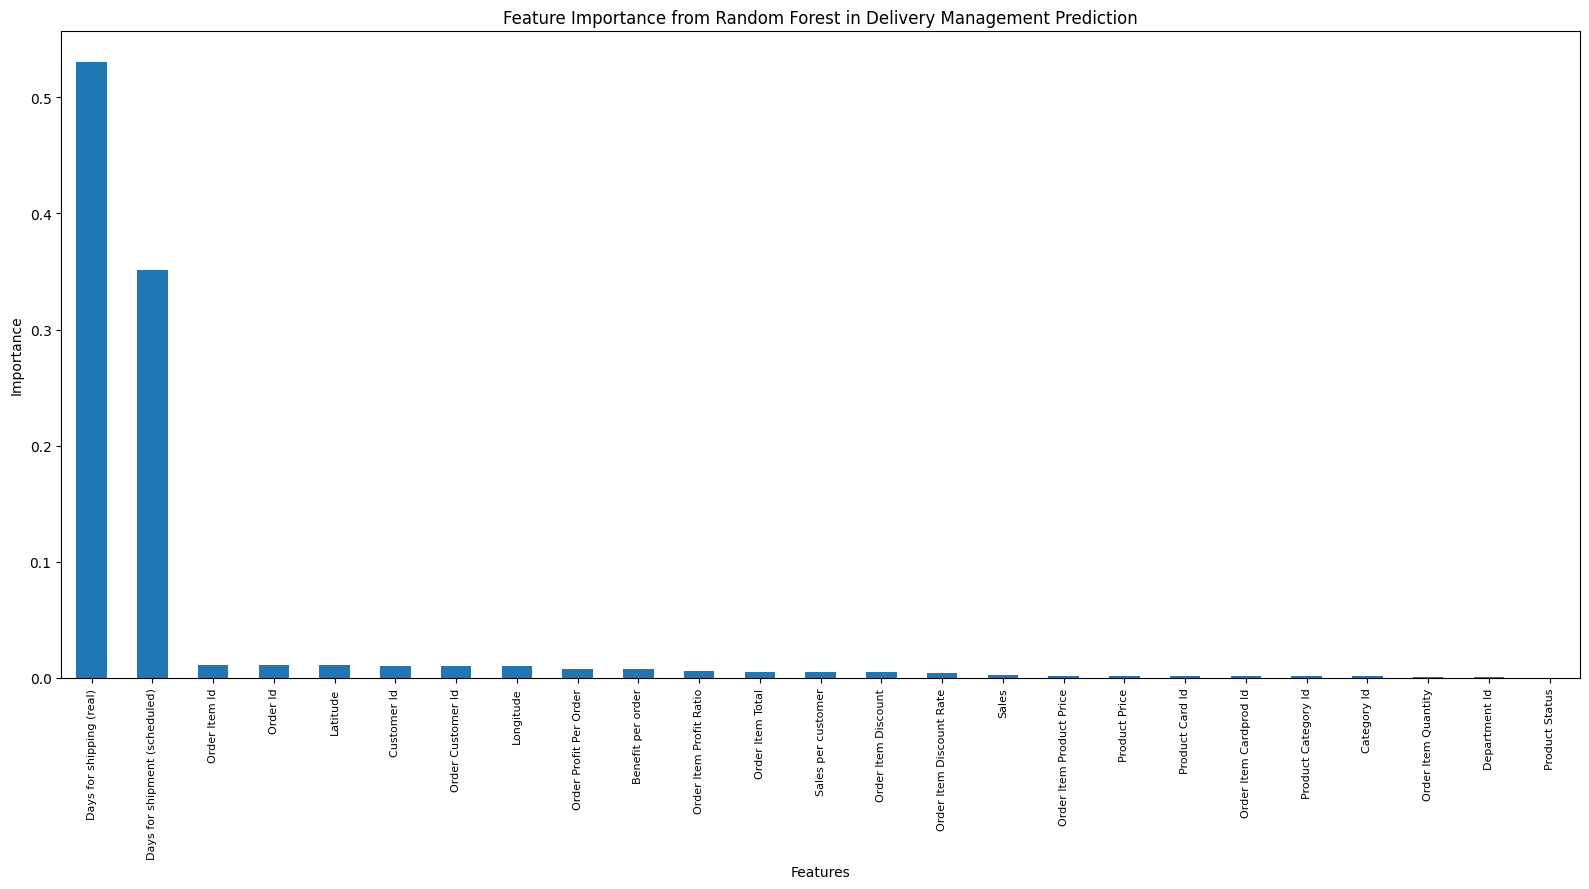

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train your Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances from the trained Random Forest model
importances = rf.feature_importances_

# Convert the importances into a one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, index=X.columns)

# Sort the array in descending order of the importances
f_importances_sorted = f_importances.sort_values(ascending=False)

# Make the bar plot from f_importances_sorted
plt.figure(figsize=(16, 9))
f_importances_sorted.plot(kind='bar', rot=90)  # Increase rotation to 90 degrees

# Add labels and title to the plot
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest in Delivery Management Prediction')
plt.xticks(fontsize=8)  # Adjust the font size to make the labels smaller
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
#Print the sorted feature importances
print("Feature Importance from Random Forest in Delivery Management Prediction:")
print(f_importances_sorted)

Feature Importance from Random Forest in Delivery Management Prediction:
Days for shipping (real)         0.530320
Days for shipment (scheduled)    0.351651
Order Item Id                    0.011055
Order Id                         0.011009
Latitude                         0.010970
Customer Id                      0.010508
Order Customer Id                0.010487
Longitude                        0.009802
Order Profit Per Order           0.007585
Benefit per order                0.007437
Order Item Profit Ratio          0.005918
Order Item Total                 0.005252
Sales per customer               0.005248
Order Item Discount              0.005203
Order Item Discount Rate         0.003842
Sales                            0.002320
Order Item Product Price         0.001741
Product Price                    0.001702
Product Card Id                  0.001562
Order Item Cardprod Id           0.001557
Product Category Id              0.001439
Category Id                      0.001412
Ord

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM classifier
svmClassifier = SVC()

# Fit the model to the training data
svmClassifier.fit(X_train, y_train)

# Predict the test set results
y_pred = svmClassifier.predict(X_test)

# Print the accuracy of the model on the test data
print('Accuracy of SVM classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))



Accuracy of SVM classifier on test set: 0.97
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.94      0.97     16307
           1       0.96      1.00      0.98     19797

    accuracy                           0.97     36104
   macro avg       0.98      0.97      0.97     36104
weighted avg       0.98      0.97      0.97     36104



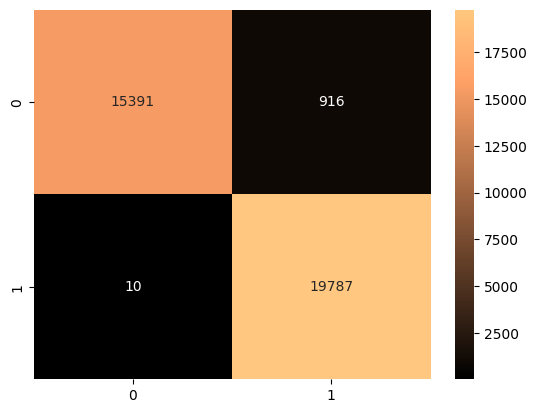

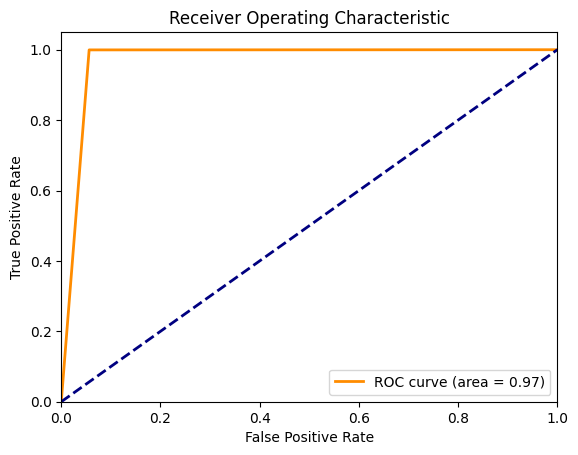

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.copper)
plt.show()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Predict the test set results
y_pred = grid_search.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
